In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

filename='output/smt/smtfeatures.csv'

Text(0.5, 1, 'Sort combinations plotted')

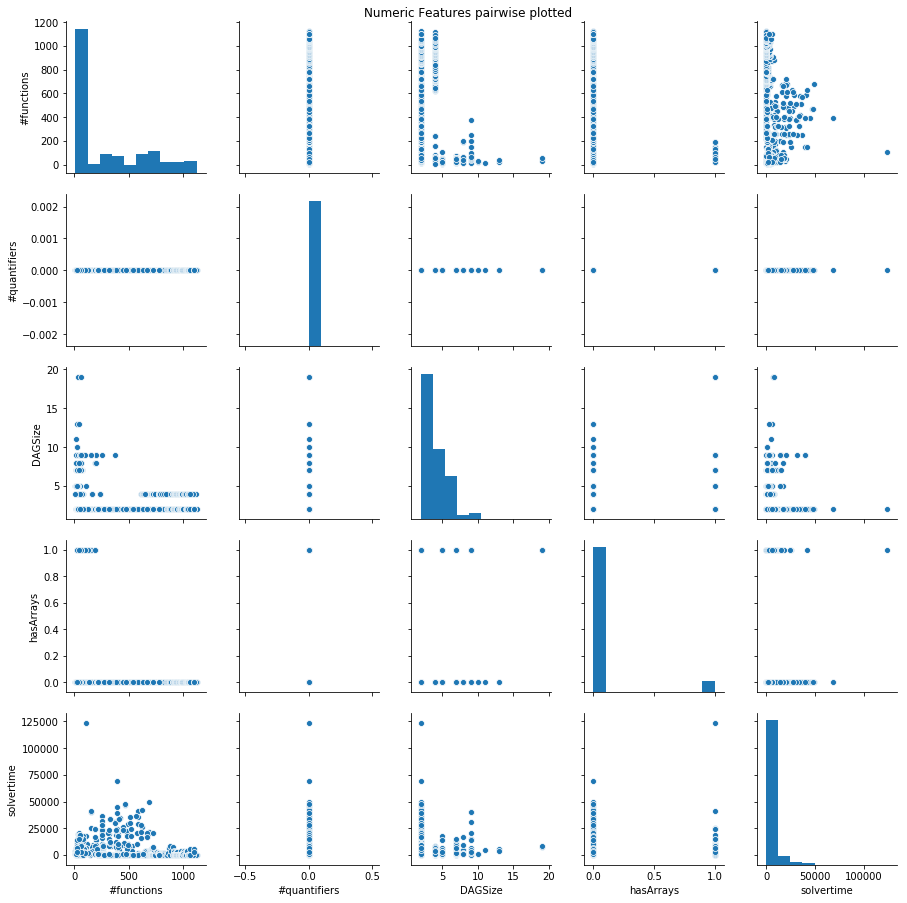

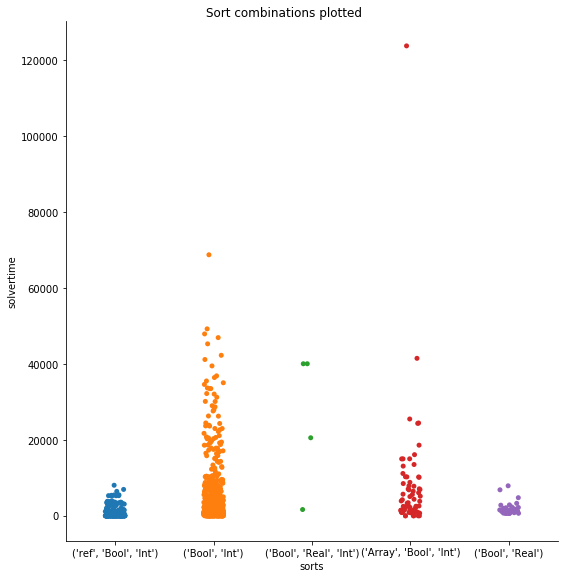

In [4]:
df = pd.read_csv(filename, delimiter=';')
df['hasArrays'] = df['hasArrays'].replace({False: 0, True: 1})
sorts = set()
for i,s in df.iterrows():
    sorts_array = s['sorts'].strip('][').split(', ')
    df.at[i,'sorts'] = tuple(sorts_array)
    #sorts.add(tuple(sorts_array))
    
feature_names = ['#functions', '#quantifiers','DAGSize','hasArrays', 'solvertime']
df_filtered = df[feature_names]
pairplot = sns.pairplot(df_filtered)
pairplot.fig.suptitle("Numeric Features pairwise plotted", y=1)

sorts_plot = sns.catplot(x="sorts", y="solvertime", data=df,  height=8, aspect=1,);
sorts_plot.fig.suptitle("Sort combinations plotted", y=1)
